In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [4]:
os.getcwd()

'C:\\Users\\Samuel'

In [6]:
os.chdir('D:\Python')

In [7]:
EasyVisa = pd.read_csv("EasyVisa.csv")

In [9]:
data = EasyVisa.copy()

# EDA and Preprocessing

In [11]:
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [13]:
data.shape

(25480, 12)

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [16]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [17]:
data.duplicated().sum()

0

**Observations:**

   - 25,480 records and 12 features currently.
   - There are no duplicate values and no null values so this is good.
   - case_id will likely get dropped because it does not provide any value and we already have the Python indices.
   - Data types are all ok and do not need manipulation.

In [19]:
cat_columns = data.describe(include='object').columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [21]:
# checking the unique values in each categorical column
for i in cat_columns:
    print("Unique values in", i, "are:")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in case_id are:
EZYV18889    1
EZYV17220    1
EZYV21820    1
EZYV15903    1
EZYV9842     1
            ..
EZYV2877     1
EZYV15682    1
EZYV16722    1
EZYV6557     1
EZYV14831    1
Name: case_id, Length: 25480, dtype: int64
**************************************************
Unique values in continent are:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are:
N    22525
Y     2955
Name: requires_job_t

In [22]:
data.drop(['case_id'], axis=1, inplace=True)

In [24]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

## Univariate Analysis

### Non-categorical Variables

In [26]:
# function to plot a boxplot and a histogram along the same scale
# we are using this plot for our non-categorical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

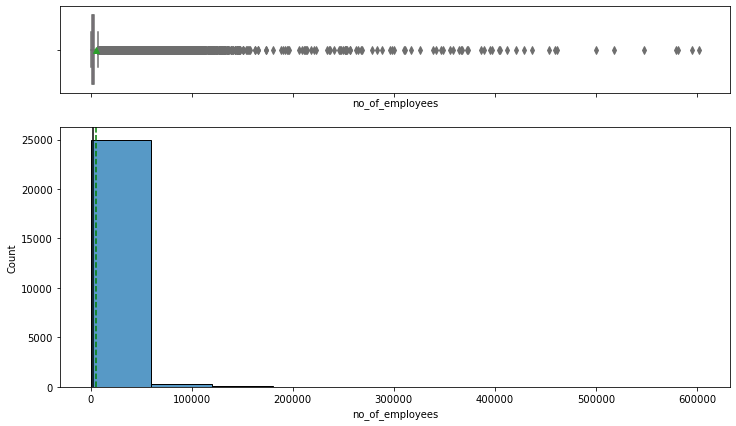

In [37]:
histogram_boxplot(data, "no_of_employees", bins=10)

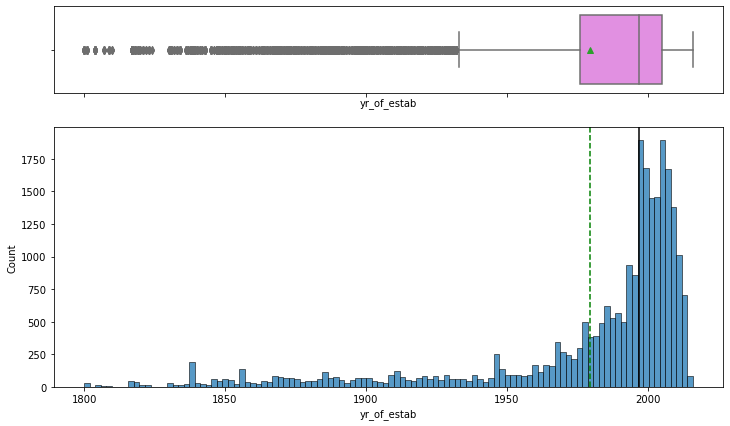

In [38]:
histogram_boxplot(data, "yr_of_estab")

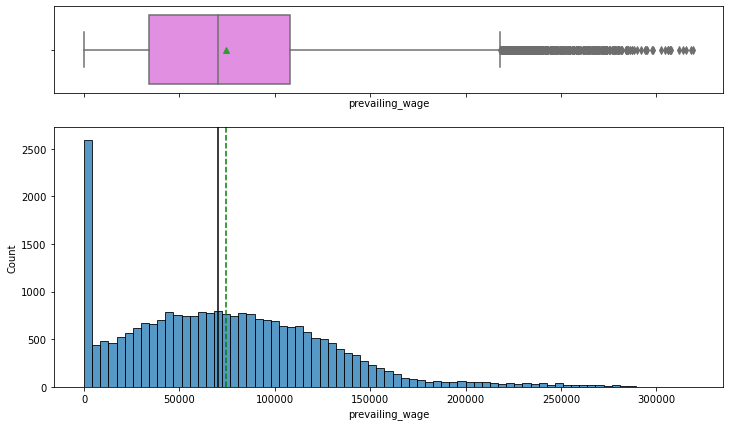

In [41]:
histogram_boxplot(data, "prevailing_wage", bins=75)

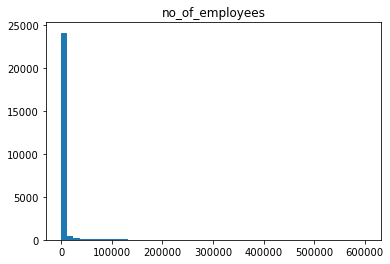

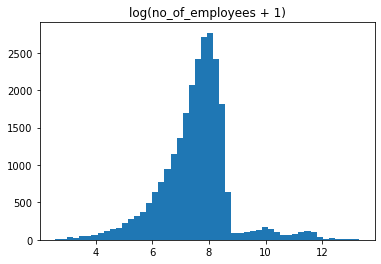

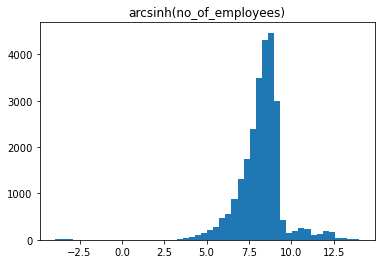

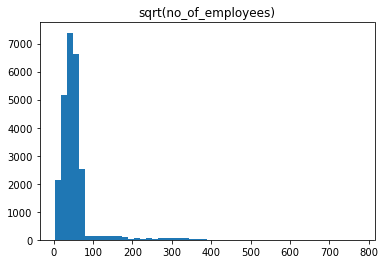

In [71]:
# viewing the transformation options to deal with skewness for no_of_employees
plt.hist(data["no_of_employees"], 50)
plt.title("no_of_employees")
plt.show()
plt.hist(np.log(data["no_of_employees"] + 1), 50)
plt.title("log(no_of_employees + 1)")
plt.show()
plt.hist(np.arcsinh(data["no_of_employees"]), 50)
plt.title("arcsinh(no_of_employees)")
plt.show()
plt.hist(np.sqrt(data["no_of_employees"]), 50)
plt.title("sqrt(no_of_employees)")
plt.show()

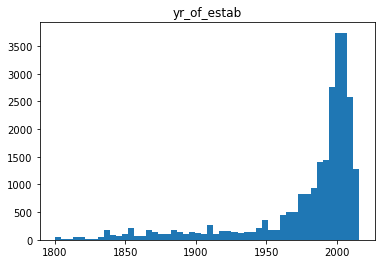

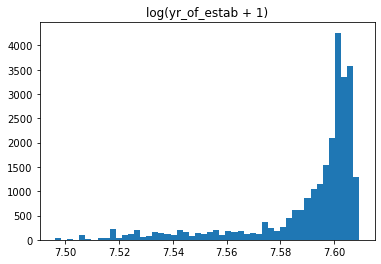

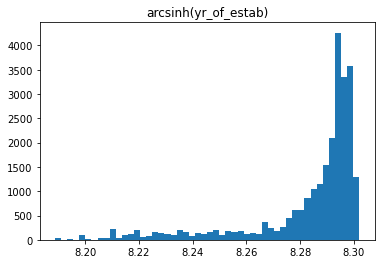

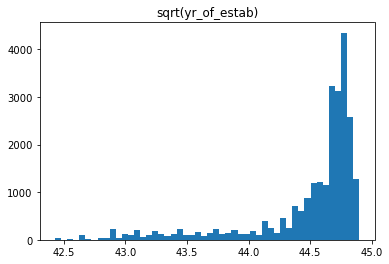

In [72]:
# viewing the transformation options to deal with skewness for yr_of_estab
plt.hist(data["yr_of_estab"], 50)
plt.title("yr_of_estab")
plt.show()
plt.hist(np.log(data["yr_of_estab"] + 1), 50)
plt.title("log(yr_of_estab + 1)")
plt.show()
plt.hist(np.arcsinh(data["yr_of_estab"]), 50)
plt.title("arcsinh(yr_of_estab)")
plt.show()
plt.hist(np.sqrt(data["yr_of_estab"]), 50)
plt.title("sqrt(yr_of_estab)")
plt.show()

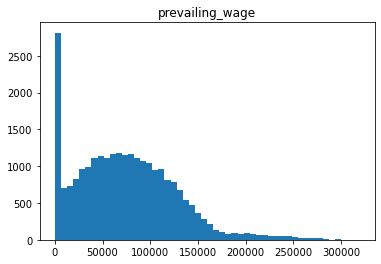

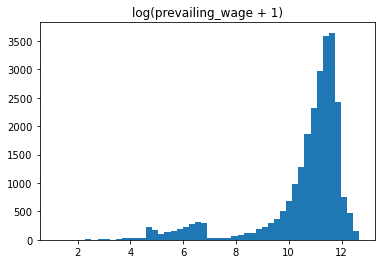

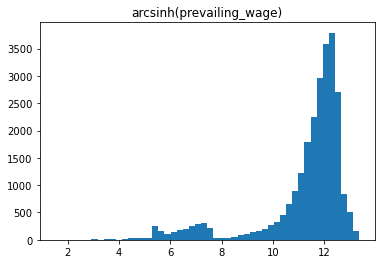

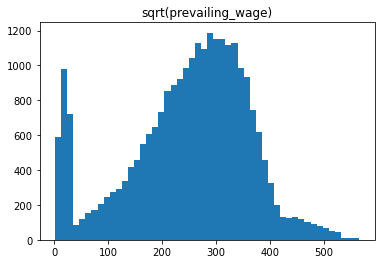

In [73]:
# viewing the transformation options to deal with skewness for prevailing_wage
plt.hist(data["prevailing_wage"], 50)
plt.title("prevailing_wage")
plt.show()
plt.hist(np.log(data["prevailing_wage"] + 1), 50)
plt.title("log(prevailing_wage + 1)")
plt.show()
plt.hist(np.arcsinh(data["prevailing_wage"]), 50)
plt.title("arcsinh(prevailing_wage)")
plt.show()
plt.hist(np.sqrt(data["prevailing_wage"]), 50)
plt.title("sqrt(prevailing_wage)")
plt.show()

In [74]:
# using sqrt to deal with skewness for both lead_time and avg_price_per_room
#df["lead_time_sqrt"] = np.sqrt(df["lead_time"])
#df["avg_price_per_room"] = np.sqrt(df["avg_price_per_room"])
#df.columns

data["log(no_of_employees + 1)"] = np.log(data["no_of_employees"] + 1)
data["sqrt_prevailing_wage"] = np.sqrt(data["prevailing_wage"])
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'log(no_of_employees + 1)',
       'sqrt_prevailing_wage'],
      dtype='object')

### Categorical Variables

In [43]:
# function to create labeled barplots
# we used this plot for our categorical variables, instead of histogram_boxplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

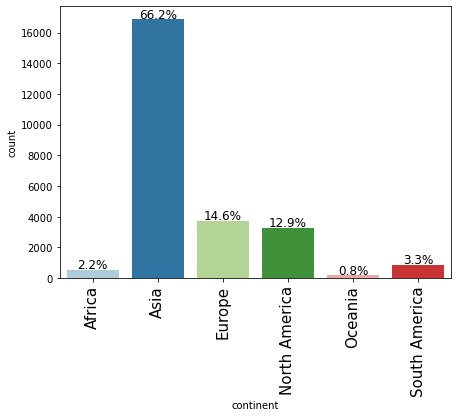

In [44]:
labeled_barplot(data, "continent", perc=True)

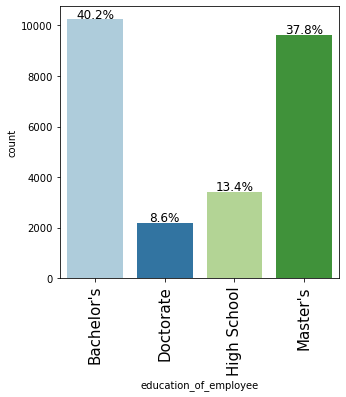

In [47]:
labeled_barplot(data, "education_of_employee", perc=True)

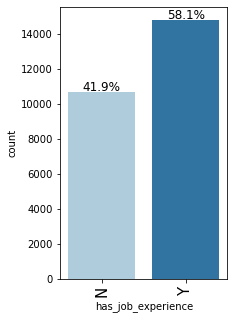

In [48]:
labeled_barplot(data, "has_job_experience", perc=True)

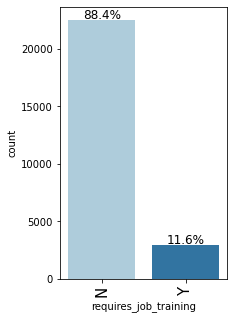

In [49]:
labeled_barplot(data, "requires_job_training", perc=True)

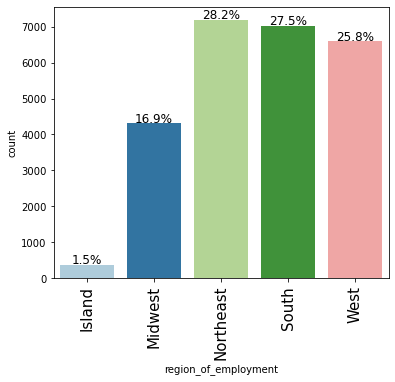

In [50]:
labeled_barplot(data, "region_of_employment", perc=True)

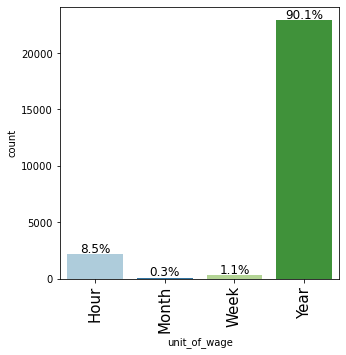

In [51]:
labeled_barplot(data, "unit_of_wage", perc=True)

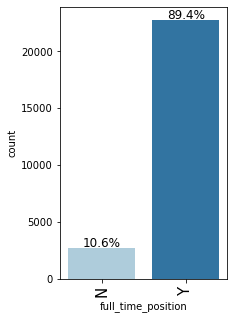

In [52]:
labeled_barplot(data, "full_time_position", perc=True)

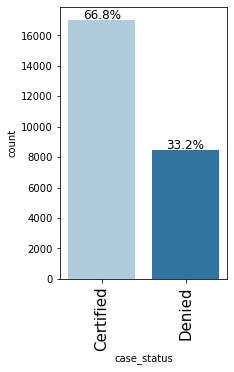

In [53]:
labeled_barplot(data, "case_status", perc=True)

**Observations:**

 - Needed transformations for "no_of_employees" and "prevailing_wage" due to skewness.
 - Transformations for "yr_of_estab" weren't helpful.
 - 66% of applicants came from Asia, while 14% came from Europe and 13% came from North America.
 - 40% of applicants had a Bachelor's or equivalent, while 38% had a Masters, 13% High School Diploma and almost 9% had a Doctorate.
 - 58% of applicatns had job experience.
 - 88% of applicants didn't require job training.
 - 28% of applicants were going to the Northeast, 27% to South, 25% to West, 17% to Midwest, and only 1.5% to Island regions.
 - 90% of applicants were on a yearly wage, meaning they were likely contract employees.
 - 89% of applicants were for full time positions.
 - Of all the more than 25000 applicants, 66.8% were certified for a work visa.

## Bivariate Analysis

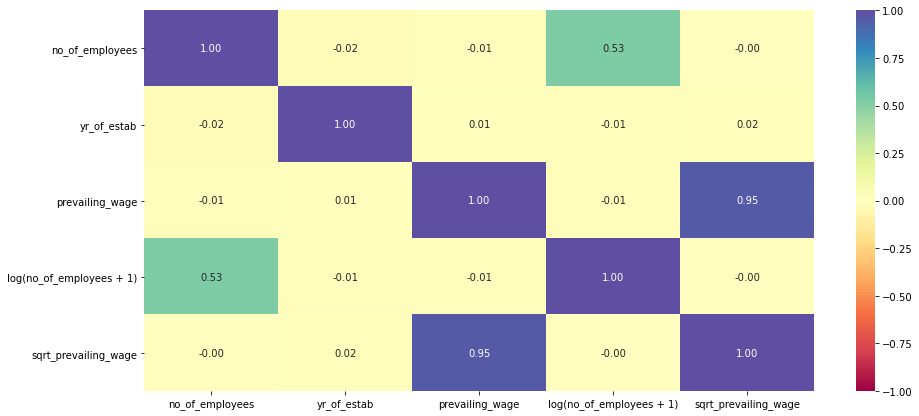

In [75]:
# Viewing  correlations
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [57]:
# function to create a stacked barplot for categorical columns
# categorical predictor variables vs target variables
def stacked_barplot(data, predictor, target):
    """
    Print the category coutns and plot a stacked bar chart
    
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


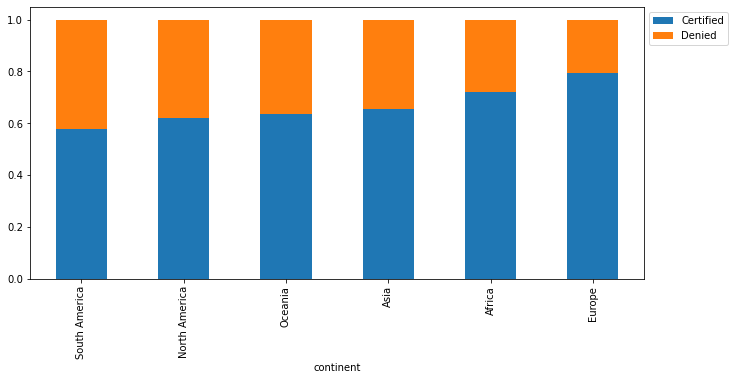

In [58]:
stacked_barplot(data, "continent", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


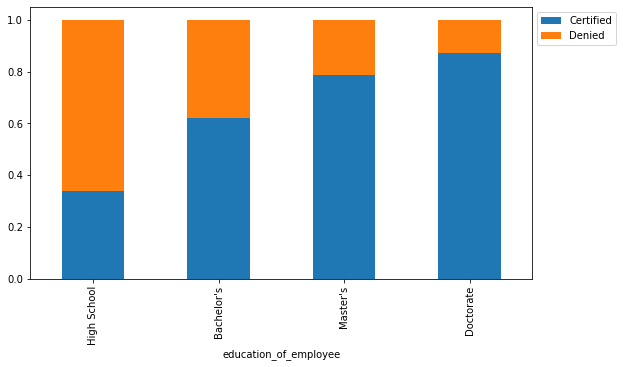

In [59]:
stacked_barplot(data, "education_of_employee", "case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


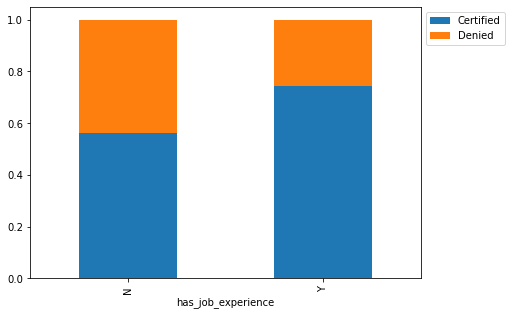

In [60]:
stacked_barplot(data, "has_job_experience", "case_status")

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


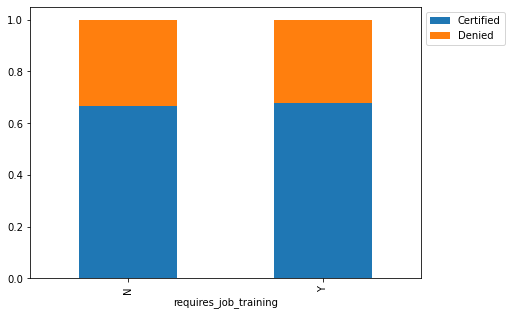

In [61]:
stacked_barplot(data, "requires_job_training", "case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


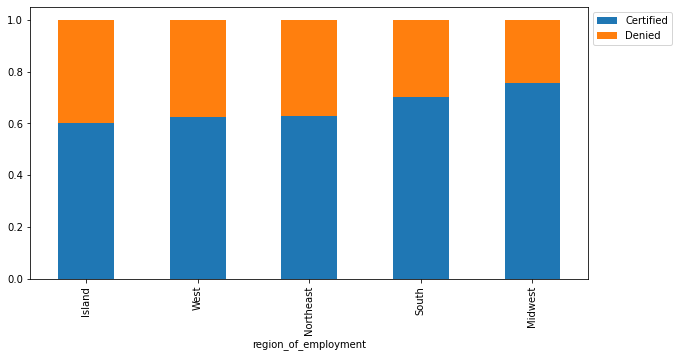

In [62]:
stacked_barplot(data, "region_of_employment", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


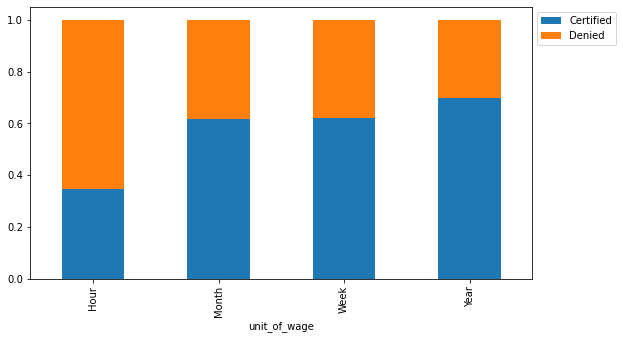

In [63]:
stacked_barplot(data, "unit_of_wage", "case_status")

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


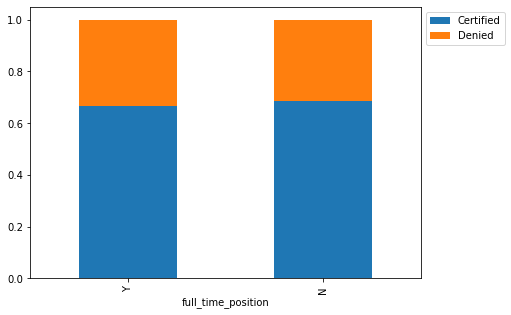

In [64]:
stacked_barplot(data, "full_time_position", "case_status")

In [65]:
# function to plot distributions with respect to target variable
# non-categorical predictor variables vs target variable
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot wrt target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (w/o outliers) wrt target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    
    plt.tight_layout()
    plt.show()

In [76]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'log(no_of_employees + 1)',
       'sqrt_prevailing_wage'],
      dtype='object')

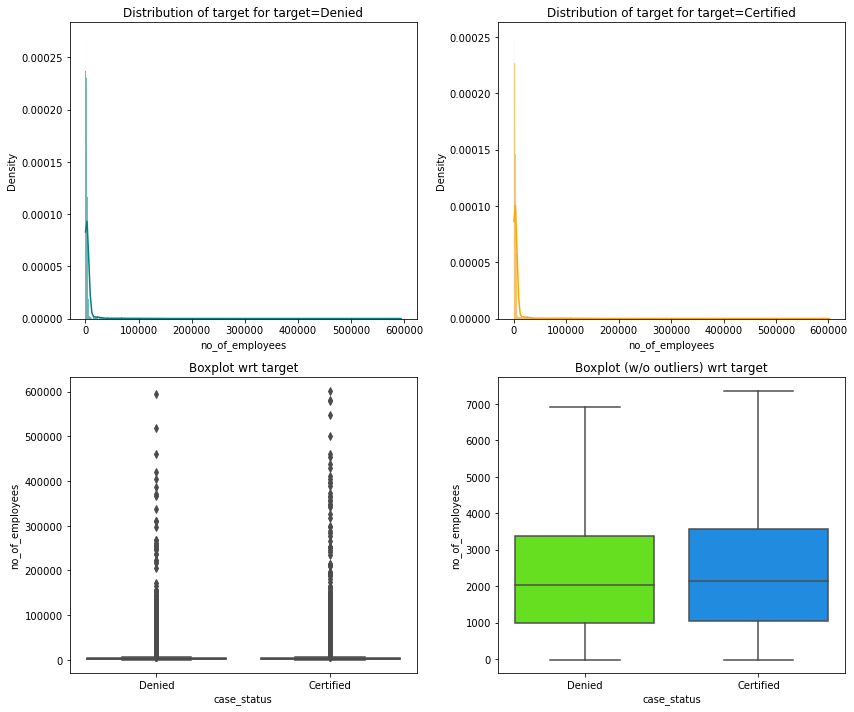

In [66]:
# this feature was transformed, but viewing this out of curiosity
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

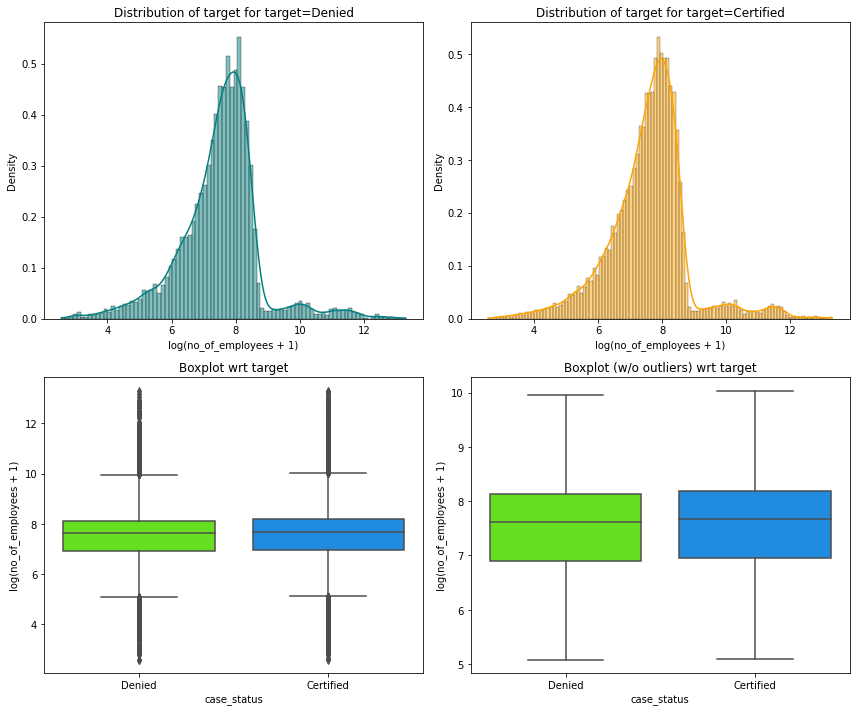

In [78]:
# this is our transformed variable for no_of_employees
distribution_plot_wrt_target(data, "log(no_of_employees + 1)", "case_status")

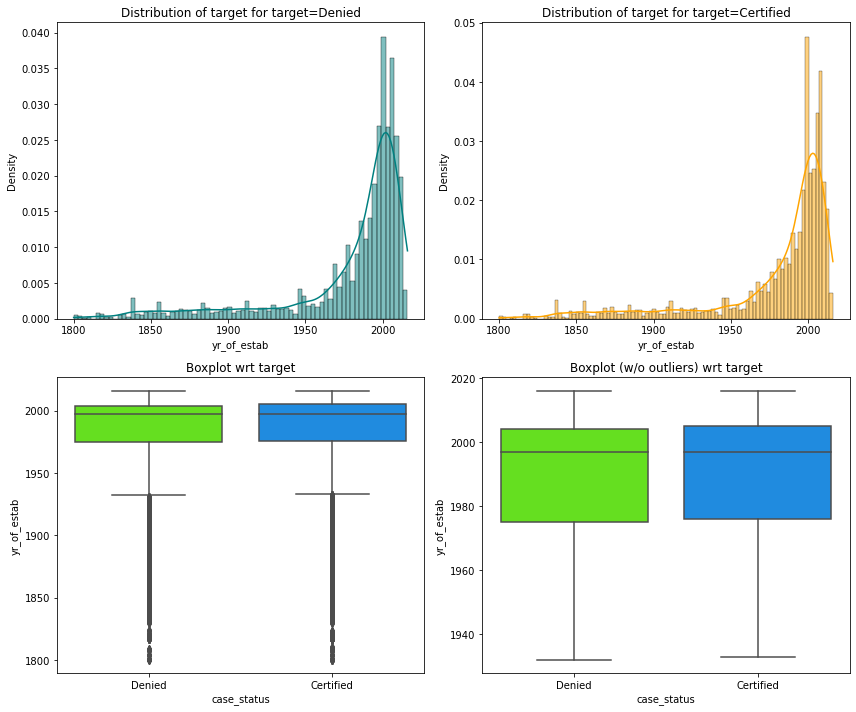

In [67]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

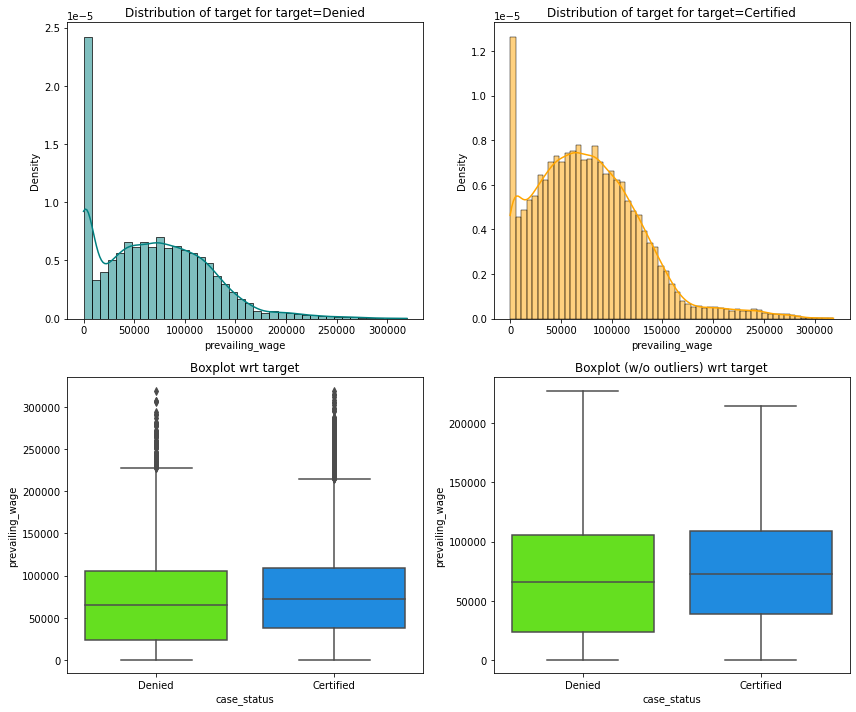

In [68]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

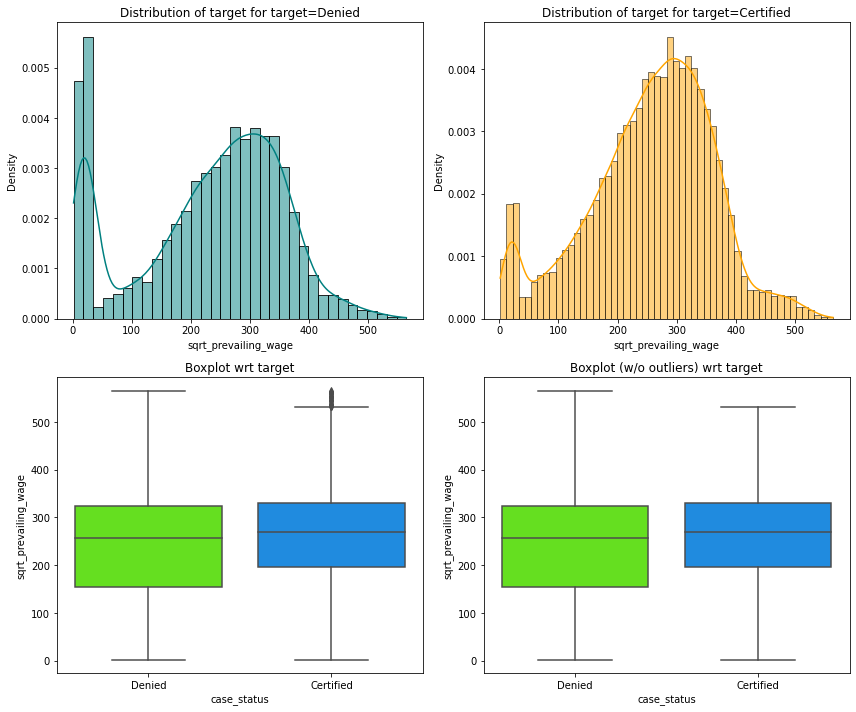

In [79]:
distribution_plot_wrt_target(data, "sqrt_prevailing_wage", "case_status")

**Observations:**

 - Highest percentage of certified applicants were from Europe>Africa>Asia>Oceania>North America>South America
 - Highest percentage of certified applicants had Doctorate>Master's>Bachelor's>High School Diploma
 - Approximately 75% of applicants that had job experience were certified, while approximately 55% of applicants without job experience were certified.
 - Applicants that required job training were certified approximately 65% of the time, same for those that didn't require training.
 - Highest percentage of certified applicants were going to Midwest>South>Northeast>West>Island region.
 - Approximately 70% of applicants who were paid yearly were certified. Lowest was hourly at approximately 35% cerifications rate.
 - Full- and part-time positions both were certified at approximately 70% rate.
 - Transformations for no_of_employees (log(no_of_employees + 1)) and prevailing_wage (sqrt_prevailing_wage) work far better  - than the original distributions so the original features will be dropped.

In [80]:
# dropping the no_of_employees and prevailing_wage columns
data.drop(["no_of_employees", "prevailing_wage"], axis=1, inplace=True)

In [81]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'yr_of_estab', 'region_of_employment',
       'unit_of_wage', 'full_time_position', 'case_status',
       'log(no_of_employees + 1)', 'sqrt_prevailing_wage'],
      dtype='object')

In [82]:
df = data.copy()

# Bagging Models

## Splitting Data and Creating Metrics

In [91]:
X = df.drop(["case_status"], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

In [92]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)
# https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter

(17836, 21) (7644, 21)


In [93]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [94]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

In [95]:
# defining a function to compute different metrics to check performance of a classifications model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    
    model: Classifier
    predictors: independent variables
    target: dependent variable
    """
    
    #predicting using the independent variables
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred) # to compute Accuracy
    recall = recall_score(target, pred) # to compute Recall
    precision = precision_score(target, pred) # to compute Precision
    f1 = f1_score(target, pred) # to compute F1 score
    
    #creating dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0]
    )
    
    return df_perf

In [118]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

 ## Building Decision Tree Model

In [133]:
dtree = DecisionTreeClassifier(criterion='gini', class_weight={0:0.66, 1:0.34}, random_state=1)

In [98]:
dtree.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [101]:
np.isfinite(X_train).all()

yr_of_estab                           True
log(no_of_employees + 1)             False
sqrt_prevailing_wage                  True
continent_Asia                        True
continent_Europe                      True
continent_North America               True
continent_Oceania                     True
continent_South America               True
education_of_employee_Doctorate       True
education_of_employee_High School     True
education_of_employee_Master's        True
has_job_experience_Y                  True
requires_job_training_Y               True
region_of_employment_Midwest          True
region_of_employment_Northeast        True
region_of_employment_South            True
region_of_employment_West             True
unit_of_wage_Month                    True
unit_of_wage_Week                     True
unit_of_wage_Year                     True
full_time_position_Y                  True
dtype: bool

In [102]:
X_train.astype({'log(no_of_employees + 1)': 'float64'}).dtypes

yr_of_estab                            int64
log(no_of_employees + 1)             float64
sqrt_prevailing_wage                 float64
continent_Asia                         uint8
continent_Europe                       uint8
continent_North America                uint8
continent_Oceania                      uint8
continent_South America                uint8
education_of_employee_Doctorate        uint8
education_of_employee_High School      uint8
education_of_employee_Master's         uint8
has_job_experience_Y                   uint8
requires_job_training_Y                uint8
region_of_employment_Midwest           uint8
region_of_employment_Northeast         uint8
region_of_employment_South             uint8
region_of_employment_West              uint8
unit_of_wage_Month                     uint8
unit_of_wage_Week                      uint8
unit_of_wage_Year                      uint8
full_time_position_Y                   uint8
dtype: object

In [103]:
dtree.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [104]:
X_train.dtypes

yr_of_estab                            int64
log(no_of_employees + 1)             float64
sqrt_prevailing_wage                 float64
continent_Asia                         uint8
continent_Europe                       uint8
continent_North America                uint8
continent_Oceania                      uint8
continent_South America                uint8
education_of_employee_Doctorate        uint8
education_of_employee_High School      uint8
education_of_employee_Master's         uint8
has_job_experience_Y                   uint8
requires_job_training_Y                uint8
region_of_employment_Midwest           uint8
region_of_employment_Northeast         uint8
region_of_employment_South             uint8
region_of_employment_West              uint8
unit_of_wage_Month                     uint8
unit_of_wage_Week                      uint8
unit_of_wage_Year                      uint8
full_time_position_Y                   uint8
dtype: object

In [108]:
# this below code did not work
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [109]:
np.isnan(X_train).all()

yr_of_estab                          False
log(no_of_employees + 1)             False
sqrt_prevailing_wage                 False
continent_Asia                       False
continent_Europe                     False
continent_North America              False
continent_Oceania                    False
continent_South America              False
education_of_employee_Doctorate      False
education_of_employee_High School    False
education_of_employee_Master's       False
has_job_experience_Y                 False
requires_job_training_Y              False
region_of_employment_Midwest         False
region_of_employment_Northeast       False
region_of_employment_South           False
region_of_employment_West            False
unit_of_wage_Month                   False
unit_of_wage_Week                    False
unit_of_wage_Year                    False
full_time_position_Y                 False
dtype: bool

In [111]:
# this is the code that fixed my issue
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [113]:
# log(no_of_employees +1) now has no infinite values
np.isfinite(X_train).all()

yr_of_estab                          True
log(no_of_employees + 1)             True
sqrt_prevailing_wage                 True
continent_Asia                       True
continent_Europe                     True
continent_North America              True
continent_Oceania                    True
continent_South America              True
education_of_employee_Doctorate      True
education_of_employee_High School    True
education_of_employee_Master's       True
has_job_experience_Y                 True
requires_job_training_Y              True
region_of_employment_Midwest         True
region_of_employment_Northeast       True
region_of_employment_South           True
region_of_employment_West            True
unit_of_wage_Month                   True
unit_of_wage_Week                    True
unit_of_wage_Year                    True
full_time_position_Y                 True
dtype: bool

In [134]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

**NOTE:**

The issues above that shows the "ValueError: Input contains NaN, infinity or a value too large for dtype('float32')" were resolved with the answer found here:

https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for?rq=1

In [116]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [123]:
from sklearn.metrics import confusion_matrix

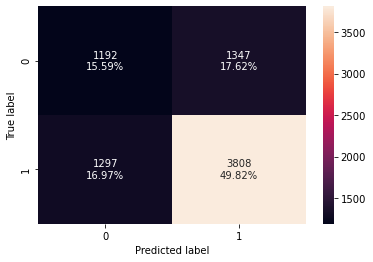

In [135]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [126]:
# to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [136]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [137]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision      F1
0  0.654108  0.745935     0.7387  0.7423


## Bagging Classifier

In [138]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

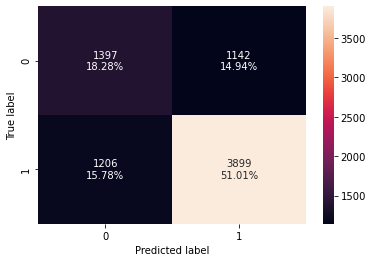

In [139]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [140]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training Performance \n", bagging_model_train_perf)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.985759  0.986653   0.991982  0.989311


In [141]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing Performance \n", bagging_model_test_perf)

Testing Performance 
    Accuracy    Recall  Precision        F1
0  0.692831  0.763761   0.773458  0.768579


## Bagging Classifier with Weighted Decision Tree

In [142]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', class_weight={0:0.66, 1:0.34}, random_state=1), random_state=1)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.66,
                                                                      1: 0.34},
                                                        random_state=1),
                  random_state=1)

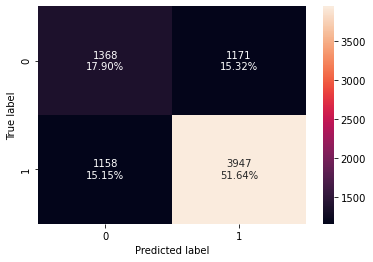

In [143]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [145]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt, X_train, y_train)
print("Training Performance \n", bagging_wt_model_train_perf)

Training Performance 
    Accuracy   Recall  Precision        F1
0  0.984862  0.98615   0.991141  0.988639


In [146]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing Performance \n", bagging_wt_model_test_perf)

Testing Performance 
    Accuracy    Recall  Precision       F1
0  0.695317  0.773164     0.7712  0.77218


## Random Forest

In [147]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

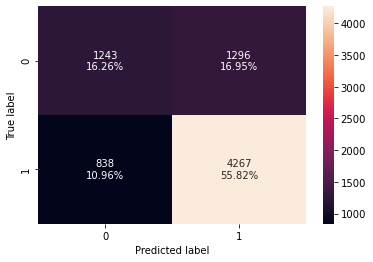

In [148]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [149]:
rf_model_train_perf=model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [150]:
rf_model_test_perf=model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.835847   0.767032  0.799963


## Random Forest with Class Weights

In [151]:
rf_wt = RandomForestClassifier(class_weight={0:0.66, 1:0.34}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

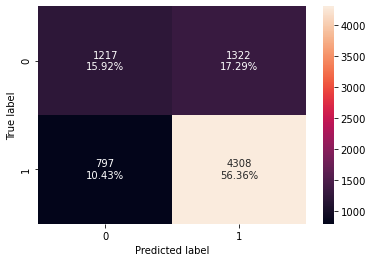

In [152]:
confusion_matrix_sklearn(rf_wt, X_test, y_test)

In [154]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train, y_train)
print("Training performance \n", rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [155]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test, y_test)
print("Testing performance \n", rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722789  0.843879   0.765187  0.802608


# Hyperparameter Tuning

## Tuning Decision Tree

In [156]:
# choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.66, 1:0.34}, random_state=1)

# grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
             'min_samples_leaf': [1, 2, 5, 7, 10],
             'max_leaf_nodes': [2, 3, 5, 10, 15],
             'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
             }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

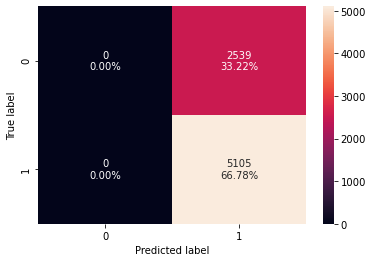

In [158]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [159]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


In [160]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


## Tuning Bagging Classifier

In [161]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.66, 1:0.34}, random_state=1)
param_grid ={'base_estimator': [cl1],
            'n_estimators':[5,7,15,51,101],
            'max_features': [0.7,0.8,0.9,1]
            }

grid = GridSearchCV(BaggingClassifier(random_state=1, bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.66,
                                                                                 1: 0.34},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [162]:
#getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.66,
                                                                      1: 0.34},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

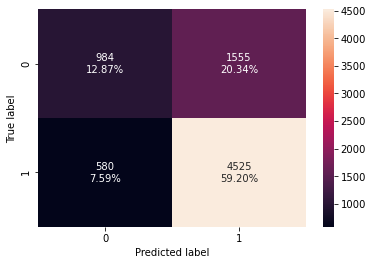

In [163]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [164]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train, y_train)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [165]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720696  0.886386   0.744243  0.809119


## Tuning Random Forest

In [166]:
# choose the type of classifier
rf_estimator = RandomForestClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, 'log2', 'auto'],
    "max_samples": [0.7, 0.9, None]
}

# run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall', cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
rf_estimator.fit(X_train, y_train)

KeyboardInterrupt: 

**NOTE:**

The kernel had to be interrupted in order to move on to other part of project. It took hours to run and still did not finish. I am aware that the project is considered incomplete due to this but am turning in what I can for partial credit.

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance \n", rf_estimator_model_train_perf)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n", rf_estimator_model_test_perf)

## Comparing Models

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     bagging_wt_model_train_perf.T,
     rf_model_train_perf.T,
     rf_wt_model_train_perf.T,
     dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
     axis=1
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"
]

print("Training performance comparison")
models_train_comp_df

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     bagging_wt_model_test_perf.T,
     rf_model_test_perf.T,
     rf_wt_model_test_perf.T,
     dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
     axis=1
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"
]

print("Testing performance comparison")
models_test_comp_df

## Feature Importance of Random Forest

In [ ]:
# importance of features in the tree building (computed as normalized total reduction of the criterion brought by that feature)
# aka gini importance
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by ='Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Boosting Models

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1- r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictors) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to copute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variables
    """
    
    #predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred) # to compute R-Squared
    adjr2 = adj_r2_score(predictors, target, pred) # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # to compute RMSE
    mae = mean_absolute_error(target, pred) # to compute MAE
    mape = mape_score(target, pred) # to compute MAPE
    
    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0]
    )
    
    return df_perf

In [ ]:
# function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model: classifier to predict values of X
    """
    
    # defining an empty list to store train and test results
    score_list=[]
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train, pred_train)
    test_r2=metrics.r2_score(y_test, pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_test))
    
    # adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # if the flag is set to True then only the following print statements will be displayed, the default value is True
    if flag==True:
        print("R-square on training set:", metrics.r2_score(y_train, pred_train))
        print("R-square on test set:", metrics.r2_score(y_test, pred_test))
        print("RMSE on training set:", np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
        print("RMSE on test set:", np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

## Decision Tree Model

In [ ]:
dtree = DecisionTreeRegressor(random_state=1)

In [ ]:
dtree_model_train_perf=model_performance_regression(dtree, X_train, y_train)
print("Training performance \n", dtree_model_train_perf)

In [ ]:
dtree_model_test_perf=model_performance_regression(dtree, X_test, y_test)
print("Test performance \n", dtree_model_test_perf)

# Hyperparameter Tuning

## Tuning Decision Tree

In [ ]:
# choose the type of classifier
dtree_tuned = DecisionTreeRegressor(random_state=1)

# grid of parameters to choose from
parameters ={'max_depth': list(np.arange(2,20)) + [None],
             'min_samples_leaf': [1, 3, 5, 7, 10],
             'max_leaf_nodes': [2, 3, 5, 10, 15] + [None],
             'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
            }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorere, cv = 5)
grid_obj =grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)